In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns


In [5]:
df = pd.read_csv('DATA/fake_reg.csv')

In [6]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


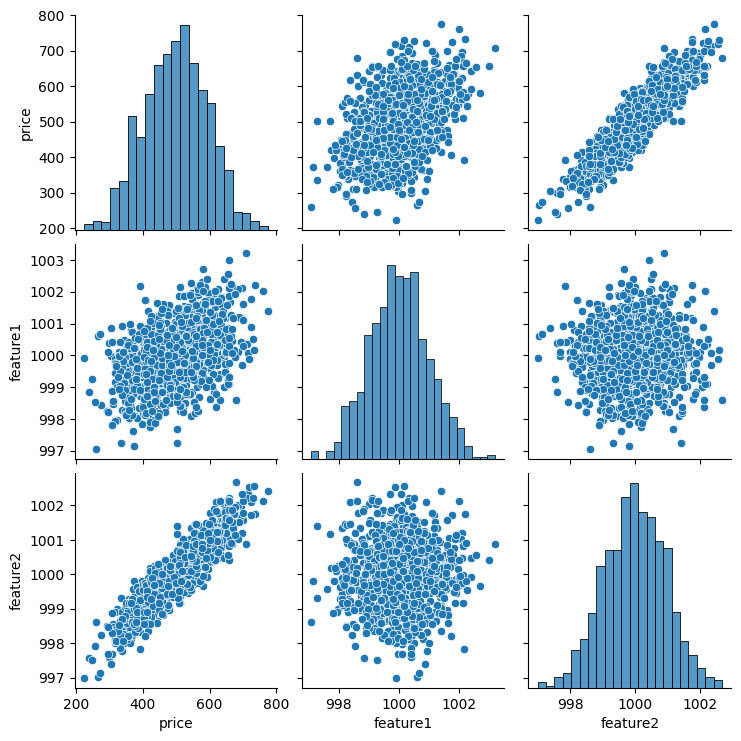

In [7]:
sns.pairplot(df)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df[['feature1','feature2']].values

In [11]:
y = df['price'].values

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
X_train.shape

(700, 2)

In [14]:
X_test.shape

(300, 2)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(X_train)

MinMaxScaler()

In [18]:
X_train = scaler.transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [21]:
X_train.max()

np.float64(1.0)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
'''model = Sequential([Dense(4,activation='relu'),
                    Dense(2,activation='relu'),
                    Dense(1)])'''

"model = Sequential([Dense(4,activation='relu'),\n                    Dense(2,activation='relu'),\n                    Dense(1)])"

In [26]:
model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [27]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 257799.4062
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 255656.8906 
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 255493.7500
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 260032.4219
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 258905.3906
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 252637.4844
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 253558.0156
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 251308.8750
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 258114.9688
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 256564.7188
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 250865.3906
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 253975.2500
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 253107.6875
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 244295.8906

In [28]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

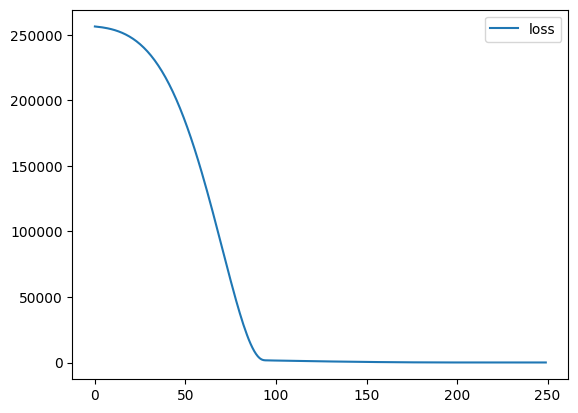

In [29]:
loss_df.plot()

In [30]:
model.evaluate(X_train,y_train,verbose=0)

24.17443084716797

In [31]:
model.evaluate(X_test,y_test,verbose=0)

24.995882034301758

In [32]:
test_predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [33]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [34]:
pred_df = pd.DataFrame(y_test , columns=['Test True Y'])

In [37]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [38]:
pred_df.columns=['Test True Y','Model Predictions']

In [39]:
pred_df

,Test True Y,Model Predictions
0,402.296319,405.003021
1,624.156198,623.135742
2,582.455066,591.733765
3,578.588606,571.875244
4,371.224104,366.399109
...,...,...
295,525.704657,528.713501
296,502.909473,515.064819
297,612.727910,609.249756
298,417.569725,416.639221


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

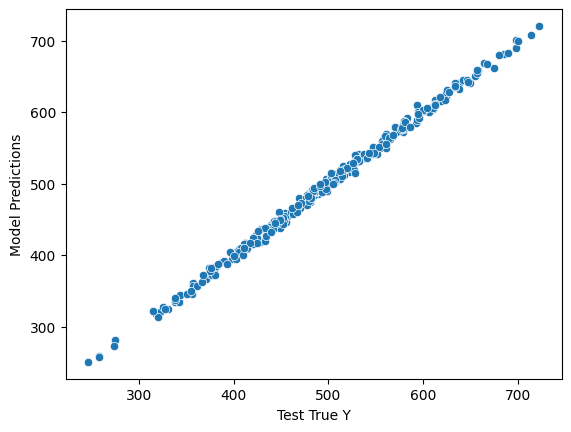

In [40]:
sns.scatterplot(data=pred_df,x='Test True Y',y='Model Predictions')

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [42]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.002648224893312

In [43]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [44]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

24.995885660908154

In [45]:
new_gem = [[998,1000]]

In [47]:
new_gem =scaler.transform(new_gem)

In [49]:
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[419.43732]], dtype=float32)

In [50]:
from tensorflow.keras.models import load_model

In [51]:
model.save("my_gem_model.h5")

In [56]:
import tensorflow as tf

# Define the custom 'mse' function
def mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))


In [57]:
later_model=load_model("my_gem_model.h5", custom_objects={'mse': mse})

In [58]:
later_model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


array([[419.43732]], dtype=float32)